In [31]:
import os
import numpy as np
import cv2
import glob
# this first cell is to import the database from my computer

#label: [mult add sub]
fnames_mult=[]
fnames_mult = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/train/*.jpg')]
train_mult = [];
labels_mult = [];
for i in range(len(fnames_mult)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/train/' + fnames_mult[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    train_mult.append(image);
    labels_mult.append([1,0,0]);

fnames_add = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/train/*.jpg')]
train_add = [];
labels_add = [];
for i in range(len(fnames_add)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/train/' + fnames_add[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    train_add.append(image);
    labels_add.append([0,1,0]);

fnames_sub = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/train/*.jpg')]
train_sub = [];
labels_sub = [];
for i in range(len(fnames_sub)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/train/' + fnames_sub[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,]);
    train_sub.append(image);
    labels_sub.append([0,0,1]);

input_x = np.concatenate((train_mult, train_add, train_sub), axis=0)
labels = np.concatenate((labels_mult, labels_add, labels_sub), axis=0)

In [16]:
print(np.shape(train_mult));
print(np.shape(labels_mult));

print(np.shape(train_add));
print(np.shape(labels_add));

print(np.shape(train_sub));
print(np.shape(labels_sub));

print(np.shape(input_x));
print(np.shape(labels));

(4013, 784)
(4013, 3)
(3796, 784)
(3796, 3)
(3781, 784)
(3781, 3)
(11590, 784)
(11590, 3)


In [32]:
#from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

#training process using mult, add and sub
#label: [mult add sub]

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 10], stddev=0.2))
W = tf.Variable(tf.zeros([784, 3]))
b = tf.Variable(tf.zeros([3]))
y = tf.matmul(x, W) + b
#y = tf.nn.softmax(y) no activation function

# some train samples, 3 classes

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 3])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# labels: [mult add sub]

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs = input_x
    batch_ys = labels
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [35]:
#calculating accuracy for test sample
fnames_mult = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/test/*.jpg')]
test_mult = [];
labels_mult_tst = [];
for i in range(len(fnames_mult)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/test/' + fnames_mult[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    test_mult.append(image);
    labels_mult_tst.append([1,0,0]);

fnames_add = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/test/*.jpg')]
test_add = [];
labels_add_tst = [];
for i in range(len(fnames_add)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/test/' + fnames_add[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    test_add.append(image);
    labels_add_tst.append([0,1,0]);

fnames_sub = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/test/*.jpg')]
test_sub = [];
labels_sub_tst = [];
for i in range(len(fnames_sub)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/test/' + fnames_sub[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    test_sub.append(image);
    labels_sub_tst.append([0,0,1]);
    
input_tst = np.concatenate((test_mult, test_add, test_sub), axis=0)
labels_tst = np.concatenate((labels_mult_tst, labels_add_tst, labels_sub_tst), axis=0)

weights = np.array(sess.run(W))
biases = np.array(sess.run(b))

outputs_test = np.dot(input_tst,weights)+biases
n_tst_samples = len(outputs_test);
correct_prediction = 0;
for i in range(n_tst_samples):
    if outputs_test[i].argmax() == labels_tst[i].argmax():
        correct_prediction = correct_prediction + 1
        #print(correct_prediction)

accuracy = float(correct_prediction)/float(n_tst_samples);
print("Test accuracy: %f" % accuracy);

Test accuracy: 0.967659


In [36]:
print(np.shape(test_add));
print(np.shape(labels_add_tst));

print(np.shape(test_mult));
print(np.shape(labels_mult_tst));

print(np.shape(input_tst));
print(np.shape(labels_tst));

(899, 784)
(899, 3)
(700, 784)
(700, 3)
(1948, 784)
(1948, 3)


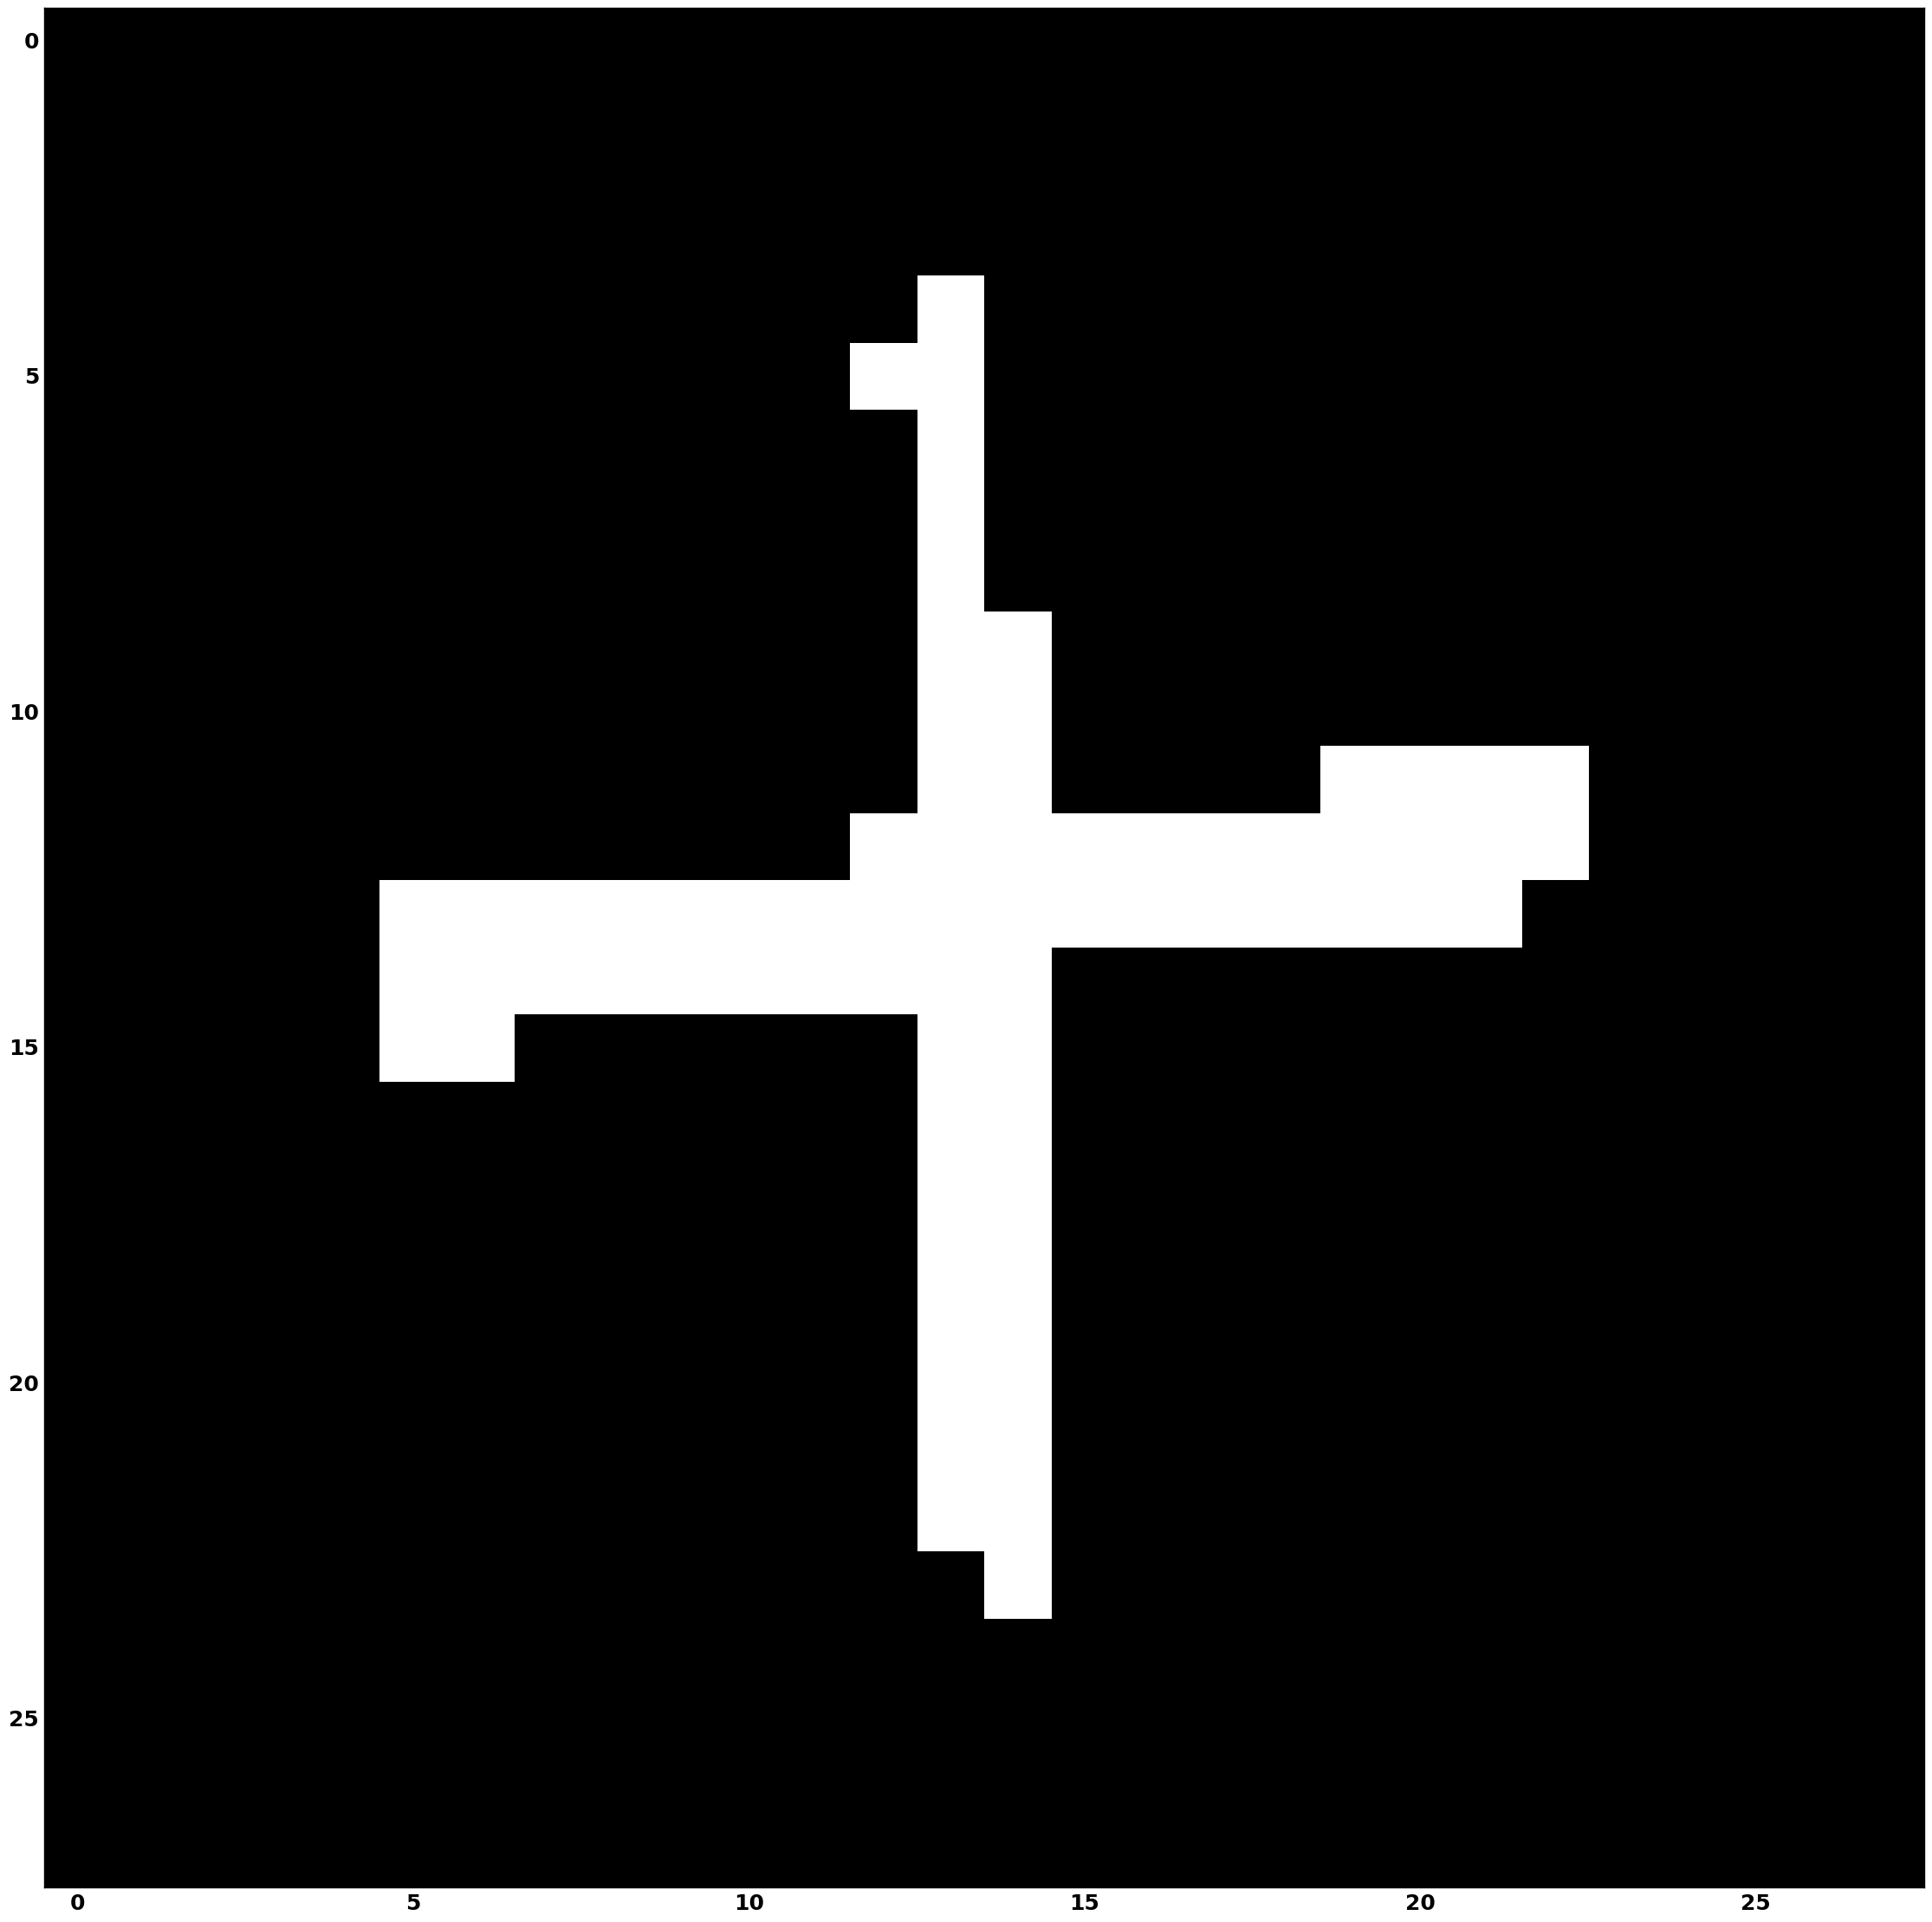

In [39]:
img_raw = cv2.imread('mini_test_sample/mais.jpg',cv2.IMREAD_GRAYSCALE)
img_raw = cv2.resize(img_raw, (28, 28)) 

inv_mat = np.ones([28,28])*255
img_inv = abs(np.subtract(img_raw, inv_mat))
img_inv[img_inv>20] = 255
img_inv[img_inv<20] = 0
img_norm = img_inv/255

#image_norm = input_tst[0]
#image_norm = np.reshape(image_norm,[28,28])

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline
fig, ax = plt.subplots(figsize=(28,28),nrows=1, ncols=1)

ax.imshow(img_norm,cmap='gray',interpolation="nearest")

In [40]:
test_in = np.reshape(img_norm,[784,])
out_teste = np.dot(test_in,weights)+biases
#label: [mult add sub]

print(out_teste)
#print ("Resposta: %d" % out_teste.argmax())
if out_teste.argmax() == 0:
    print ("Resposta: multiplicar")
if out_teste.argmax() == 1:
    print ("Resposta: somar")
if out_teste.argmax() == 2:
    print ("Resposta: subtrair")

[   2.88347074  307.70708406 -310.59029138]
Resposta: somar


In [24]:
np.savetxt('weights_op.txt', weights, fmt='%7.2f')
print(np.shape(weights))

np.savetxt('biases_op.txt', biases, fmt='%7.2f')
print(np.shape(biases))

(784, 3)
(3,)
